In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [55]:
#Membaca semua data kemudian menggabungkannya menjadi satu
df = pd.DataFrame(columns=['Package Name', 'App Version Code', 'App Version Name',
       'Reviewer Language', 'Device', 'Review Submit Date and Time',
       'Review Submit Millis Since Epoch', 'Review Last Update Date and Time',
       'Review Last Update Millis Since Epoch', 'Star Rating', 'Review Title',
       'Review Text', 'Developer Reply Date and Time',
       'Developer Reply Millis Since Epoch', 'Developer Reply Text',
       'Review Link'])
files = glob.glob(r'*.csv')
for f in files:
    Data = pd.read_csv(f,sep=',',encoding="utf-16")
    df = pd.concat([Data,df])
    print(df.shape)

df.head()


(3, 16)
(8, 16)
(10, 16)
(36, 16)
(37, 16)
(79, 16)
(129, 16)
(153, 16)
(166, 16)
(167, 16)
(174, 16)
(177, 16)
(186, 16)
(193, 16)
(204, 16)
(217, 16)
(250, 16)


,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link
0,com.pos.bisatampil,1,1.0,en,RMX1971,2020-05-03T07:47:57Z,1588492077767,2020-05-03T07:50:53Z,1588492253324,5,NaN,Aplikasi yang memudahkan kita untuk melakukan ...,2020-09-07T06:36:09Z,1.599461e+12,"Hai Naufal Fawwaz Andriawan, Terima kasih atas...",http://play.google.com/console/developers/5503...
1,com.pos.bisatampil,1,1.0,id,lavender,2020-05-04T04:43:53Z,1588567433120,2020-05-04T04:43:53Z,1588567433120,5,NaN,Sangat membantu di kondisi wfh seperti sekaran...,2020-09-07T06:35:48Z,1.599461e+12,"Hai Tri Yulianto, Terima kasih atas ulasannya....",http://play.google.com/console/developers/5503...
2,com.pos.bisatampil,2,1.0,en,j7velte,2020-05-04T18:46:20Z,1588617980847,2020-05-04T22:25:18Z,1588631118037,5,NaN,"Conference call, video chat, share screen muda...",2020-09-07T06:35:19Z,1.599461e+12,"Hai Octaviano, Terima kasih atas ulasannya. Te...",http://play.google.com/console/developers/5503...
3,com.pos.bisatampil,NaN,NaN,en,j7velte,2020-05-04T22:27:26Z,1588631246720,2020-05-04T22:27:26Z,1588631246720,5,NaN,Bermanfaat untuk apps tellhealth. Terima kasih...,2020-09-07T06:34:53Z,1.599460e+12,"Hai Tellhealth AI, Terima kasih atas ulasannya...",http://play.google.com/console/developers/5503...
4,com.pos.bisatampil,NaN,NaN,en,j7velte,2020-05-04T22:28:36Z,1588631316412,2020-05-04T22:28:36Z,1588631316412,5,NaN,Keren sekali aplikasinya bisa d pakai untuk ra...,2020-09-07T06:34:26Z,1.599460e+12,"Hai Tandus ID, Terima kasih atas ulasannya. Te...",http://play.google.com/console/developers/5503...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 2
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Package Name                           250 non-null    object 
 1   App Version Code                       184 non-null    object 
 2   App Version Name                       184 non-null    object 
 3   Reviewer Language                      250 non-null    object 
 4   Device                                 247 non-null    object 
 5   Review Submit Date and Time            250 non-null    object 
 6   Review Submit Millis Since Epoch       250 non-null    object 
 7   Review Last Update Date and Time       250 non-null    object 
 8   Review Last Update Millis Since Epoch  250 non-null    object 
 9   Star Rating                            250 non-null    object 
 10  Review Title                           0 non-null      float64
 11  Review T

In [4]:
# Membuat new_df dari df
new_df = df[['Star Rating','Review Text']]
new_df.head()

,Star Rating,Review Text
0,5,Aplikasi yang memudahkan kita untuk melakukan ...
1,5,Sangat membantu di kondisi wfh seperti sekaran...
2,5,"Conference call, video chat, share screen muda..."
3,5,Bermanfaat untuk apps tellhealth. Terima kasih...
4,5,Keren sekali aplikasinya bisa d pakai untuk ra...


In [5]:
#Menambahkan kolom sentiment
sentiment = []
for _, row in new_df.iterrows():
  if row['Star Rating'] >= 4:
    sentiment.append('Positif')
  elif row['Star Rating'] == 3:
    sentiment.append('Netral')
  else:
    sentiment.append('Negatif')

new_df['Sentiment'] = sentiment
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Star Rating,Review Text,Sentiment
0,5,Aplikasi yang memudahkan kita untuk melakukan ...,Positif
1,5,Sangat membantu di kondisi wfh seperti sekaran...,Positif
2,5,"Conference call, video chat, share screen muda...",Positif
3,5,Bermanfaat untuk apps tellhealth. Terima kasih...,Positif
4,5,Keren sekali aplikasinya bisa d pakai untuk ra...,Positif


In [6]:
#Cek data yang kosong
new_df.isna().sum()

Star Rating     0
Review Text    63
Sentiment       0
dtype: int64

In [7]:
#mengganti comment kosong yg positif menjadi bagus
new_df['Review Text'] = np.where((new_df['Review Text'].isna() & new_df.Sentiment.str.contains('Positif')),'bagus',new_df['Review Text'])
new_df['Review Text'] = np.where((new_df['Review Text'].isnull() & new_df.Sentiment.str.contains('Positif')),'bagus',new_df['Review Text'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
new_df.isna().sum()

Star Rating    0
Review Text    2
Sentiment      0
dtype: int64

In [9]:
new_df['Review Text'].fillna('NaN', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [10]:
new_df.isna().sum()

Star Rating    0
Review Text    0
Sentiment      0
dtype: int64

In [11]:
#Melihat Persebaran Datanya
new_df.groupby(['Sentiment','Star Rating'])['Review Text'].count()

Sentiment  Star Rating
Negatif    1               25
           2                7
Netral     3                6
Positif    4               11
           5              201
Name: Review Text, dtype: int64

In [12]:
print(new_df['Review Text'].values)

['Aplikasi yang memudahkan kita untuk melakukan meeting secara online dimanapun dan kapanpun dengan fitur yang sangat lengkap'
 'Sangat membantu di kondisi wfh seperti sekarang ini'
 'Conference call, video chat, share screen mudah. Gratis jg. Kalau mau yg pro harga nya terjangkau dan bisa bayar transfer.. bisa join room dan lihat event yg available. Bagus banget apps nya'
 'Bermanfaat untuk apps tellhealth. Terima kasih BISA Tampil'
 'Keren sekali aplikasinya bisa d pakai untuk rapat tanpa lambat dan batas jam. Bisa pakai up to 5 jam non stop'
 'Aplikasinya sangat bagus cocok nih untuk dipakai meeting online di tunggu untuk versi selanjutnya :)'
 'Mantap. BISA Tampil menjadi solusi bagi kami mahasiswa yg sedang melaksanakan perkuliahan... Terima kasih'
 'Tampilan yang simpel, fiturnya lengkap, terutama share screen yg bisa dipakai buat belajar, meeting dan keperluan lain😁'
 'Aplikasinya sangat membantu untuk meeting/kuliah online dan tampilannya sangat mudah dipahami. Tingkatkan lagi'

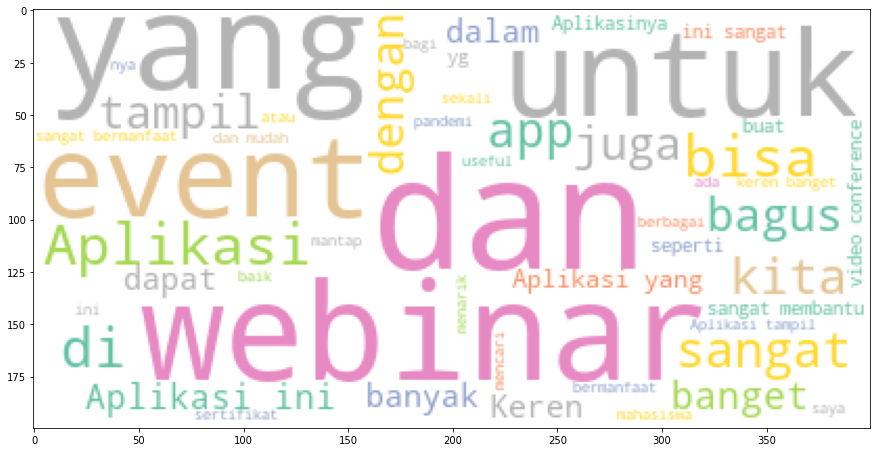

In [13]:
#Lihat persebaran kata di review text yang positif
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Positif')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

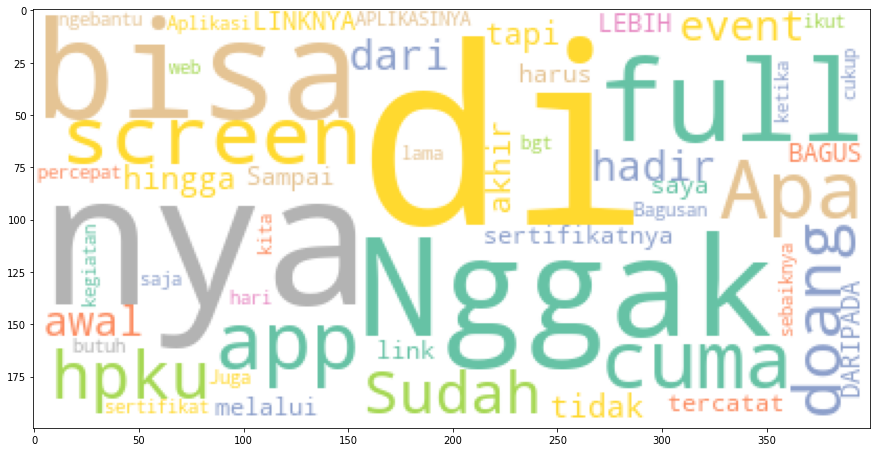

In [14]:
#Lihat persebaran kata di review text yang netral
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Netral')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

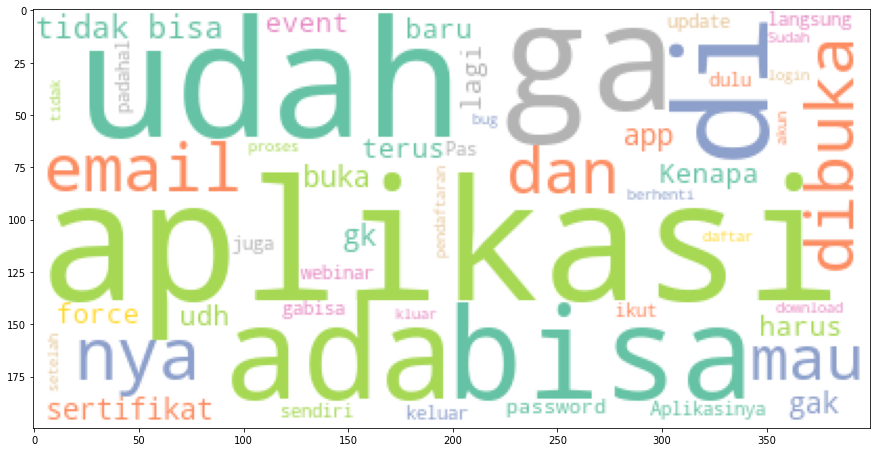

In [15]:
#Lihat persebaran kata di review text yang negatif
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Negatif')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

# Preprocessing Text

In [16]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 4.2 MB/s 


In [17]:
#Pre Process Text untuk menghilangkan stop word
from nltk.tokenize import sent_tokenize, word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import re
import string

def pre_process(text):
    # Case Folding: Lowercase
    # Merubah format teks menjadi format huruf kecil semua (lowercase).
    text = text.lower()

    # Case Folding: Removing Number
    # Menghapus karakter angka.
    text = re.sub(r"\d+", "", text)
    # Menghapus kata yg kurang dari 4 huruf
    text = re.sub(r'\b\w{1,3}\b', '', text)

    # Case Folding: Removing Punctuation
    # Menghapus karakter tanda baca.
    text = text.translate(str.maketrans("","",string.punctuation))

    #Case Folding: Removing Whitespace
    #Menghapus karakter kosong.
    text = text.strip()

    #Menghapus emote icon
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    text = emoji_pattern.sub(r'', text) # no emoji
    
    #Separating Sentences with Split () Method
    #Fungsi split() memisahkan string ke dalam list dengan spasi sebagai pemisah jika tidak ditentukan pemisahnya.
    pisah = text.split()
    # atau dengan re.split(r'\s+',text)

    #Filtering using sastrawi
    # Ambil Stopword bawaan
    stop_factory = StopWordRemoverFactory().get_stop_words()
    more_stopword = ['dengan', 'ia','bahwa','oleh','ngga','jadi','doang','yg','tdk', 'yang', 'dan', 'juga']
    # Merge stopword
    data = stop_factory + more_stopword
    # Menfilter stopword dengan tambahan stopword baru
    dictionary = ArrayDictionary(data)
    stopword = StopWordRemover(dictionary)
    text =  stopword.remove(text)

    return text

new_df['Review Text'] = new_df['Review Text'].apply(lambda x:pre_process(x))
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Star Rating,Review Text,Sentiment
0,5,aplikasi memudahkan untuk melakukan meeting on...,Positif
1,5,sangat membantu kondisi sekarang,Positif
2,5,conference call video chat share screen mudah ...,Positif
3,5,bermanfaat apps tellhealth terima kasih tampil,Positif
4,5,keren sekali aplikasinya pakai rapat lambat ...,Positif


In [18]:
print(new_df['Review Text'].values)

['aplikasi memudahkan untuk melakukan meeting online dimanapun  kapanpun fitur sangat lengkap'
 'sangat membantu  kondisi  sekarang'
 'conference call video chat share screen mudah gratis  kalau    harga  terjangkau  bayar transfer join room  lihat event  available bagus banget apps'
 'bermanfaat apps tellhealth terima kasih tampil'
 'keren sekali aplikasinya  pakai rapat lambat  batas  pakai      stop'
 'aplikasinya sangat bagus cocok  dipakai meeting online  tunggu versi selanjutnya'
 'mantap tampil menjadi solusi kami mahasiswa  sedang melaksanakan perkuliahan terima kasih'
 'tampilan simpel fiturnya lengkap terutama share screen  dipakai buat belajar meeting  keperluan'
 'aplikasinya sangat membantu meetingkuliah online  tampilannya sangat mudah dipahami tingkatkan'
 'banget buat dipakai meeting online untuk video call group fiturnya lengkap simple  mudah digunakan'
 'aplikasi  sangat bagus bantu dalam meeting online fiturnya sangat lengkap  mudah dioperasikan recommended banget bu

# Melihat grafik persebaran perkata & 2 kata

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
def top_n_ngram(corpus,n = None,ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus) #Have the count of  all the words for each review
    sum_words = bag_of_words.sum(axis =0) #Calculates the count of all the word in the whole review
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

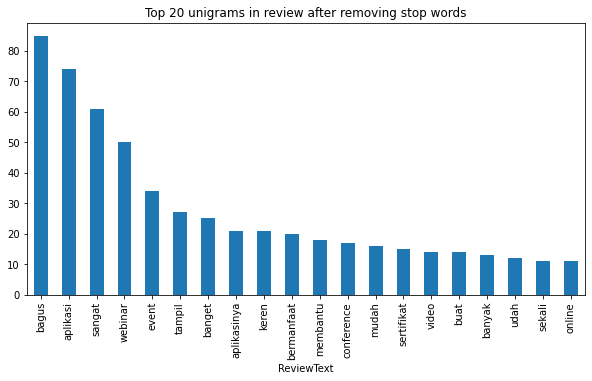

In [20]:
common_words = top_n_ngram(new_df['Review Text'], 20,1)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 unigrams in review after removing stop words')

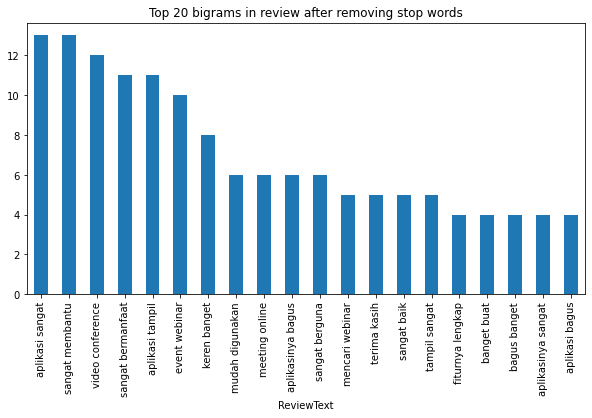

In [21]:
common_words = top_n_ngram(new_df['Review Text'], 20,2)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 bigrams in review after removing stop words')

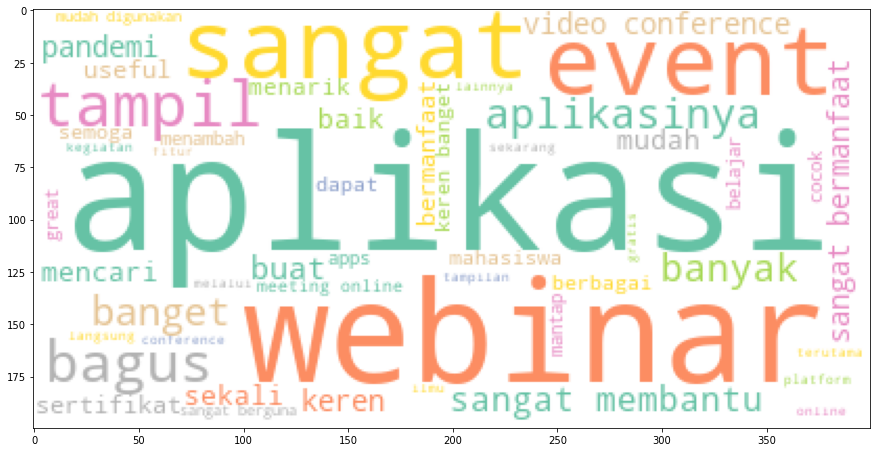

In [23]:
#Lihat persebaran kata positif di review text nya setelah di pre process
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Positif')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud)
plt.savefig('Sentiment_Analysis.png')
plt.show()

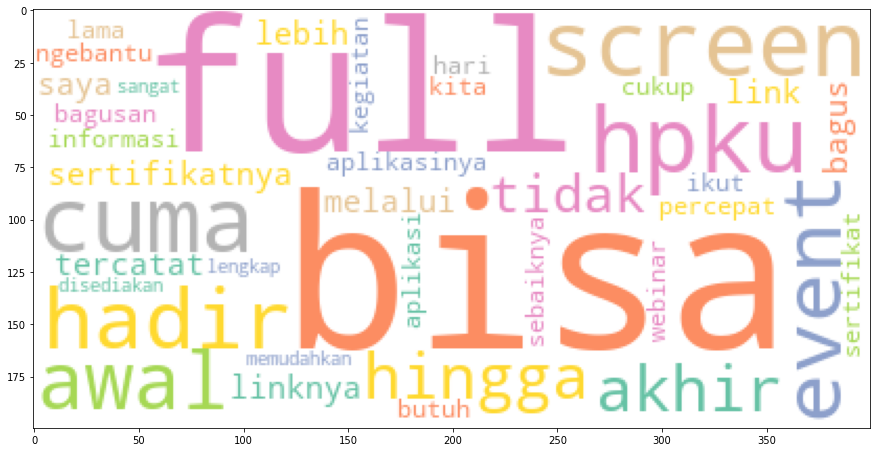

In [24]:
#Lihat persebaran kata netral di review text nya setelah di pre process
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Netral')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

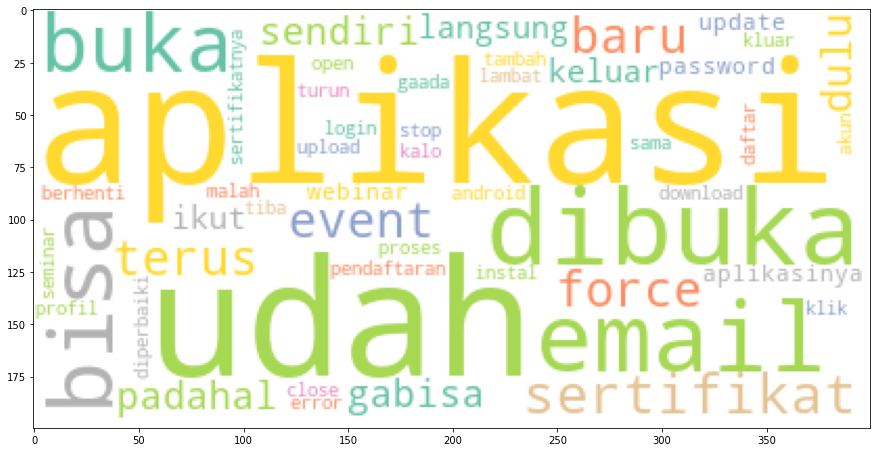

In [25]:
#Lihat persebaran kata negatif di review text nya setelah di pre process
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Negatif')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

In [26]:
#Pelabelan kolom Sentiment
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
new_df['Sentiment'] = labelencoder.fit_transform(new_df['Sentiment'])

In [27]:
new_df

,Star Rating,Review Text,Sentiment
0,5,aplikasi memudahkan untuk melakukan meeting on...,2
1,5,sangat membantu kondisi sekarang,2
2,5,conference call video chat share screen mudah ...,2
3,5,bermanfaat apps tellhealth terima kasih tampil,2
4,5,keren sekali aplikasinya pakai rapat lambat ...,2
...,...,...,...
3,5,bagus,2
4,3,,1
0,5,bagus,2
1,5,bagus,2


In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Star Rating  250 non-null    object
 1   Review Text  250 non-null    object
 2   Sentiment    250 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.8+ KB


In [29]:
new_df.describe()

,Sentiment
count,250.000000
mean,1.720000
std,0.677818
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


In [30]:
y = new_df['Sentiment']
X = new_df["Review Text"]
print(y.value_counts())

2    212
0     32
1      6
Name: Sentiment, dtype: int64


In [31]:
#Tokenisasi
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [32]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
Xnew = tokenizer.texts_to_sequences(X)

In [33]:
Xnew

[[2, 70, 71, 249, 24, 19, 250, 251, 55, 3, 29],
 [3, 11, 134, 56],
 [12,
  135,
  15,
  88,
  89,
  72,
  13,
  43,
  136,
  137,
  138,
  139,
  252,
  140,
  90,
  253,
  5,
  254,
  1,
  7,
  44],
 [10, 44, 255, 57, 45, 6],
 [8, 20, 9, 91, 256, 92, 257, 91, 93],
 [9, 3, 1, 46, 73, 24, 19, 258, 259, 141],
 [21, 6, 94, 260, 261, 34, 95, 262, 263, 57, 45],
 [47, 142, 30, 29, 58, 89, 72, 73, 16, 35, 24, 264],
 [9, 3, 11, 265, 19, 266, 3, 13, 143, 144],
 [7, 16, 73, 24, 19, 71, 15, 135, 267, 30, 29, 268, 13, 25],
 [2, 3, 1, 269, 74, 24, 19, 30, 3, 29, 13, 270, 96, 7, 16, 145, 136, 271, 137],
 [2, 1, 272, 142, 13, 25, 30, 31, 3, 146, 59, 141],
 [8, 30, 29, 13, 25, 46, 16, 24, 19, 17, 273],
 [46, 7, 16, 24, 19, 30, 29, 13, 25],
 [1],
 [274, 44],
 [47, 1, 13, 143, 55, 29, 3, 147, 25, 148, 22, 56, 2, 3, 149, 150],
 [11, 20, 48, 275, 151, 152, 276, 277],
 [1],
 [47, 2, 149, 150, 278, 138, 3, 36, 279, 56],
 [280, 3, 13],
 [1],
 [1],
 [281],
 [1],
 [3, 36, 20, 15, 12, 97, 282, 75, 75, 19],
 [1]

In [34]:
vocab_size = len(tokenizer.word_index)+1
vocab_size

673

In [35]:
Xbaru = pad_sequences(Xnew, padding = "post")

In [36]:
Xbaru

array([[  2,  70,  71, ...,   0,   0,   0],
       [  3,  11, 134, ...,   0,   0,   0],
       [ 12, 135,  15, ...,   0,   0,   0],
       ...,
       [  1,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [672,   0,   0, ...,   0,   0,   0]], dtype=int32)

In [37]:
y

0    2
1    2
2    2
3    2
4    2
    ..
3    2
4    1
0    2
1    2
2    0
Name: Sentiment, Length: 250, dtype: int64

In [38]:
#Imbalance data
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xbaru, y, test_size=0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (200, 52)
Number transactions y_train dataset:  (200,)
Number transactions X_test dataset:  (50, 52)
Number transactions y_test dataset:  (50,)


In [39]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train==2)))

sm = SMOTE(random_state=2, k_neighbors=3)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train==2)))

Before OverSampling, counts of label '1': 5
Before OverSampling, counts of label '0': 25 

Before OverSampling, counts of label '2': 170 

After OverSampling, the shape of train_X: (510, 52)
After OverSampling, the shape of train_y: (510,) 

After OverSampling, counts of label '1': 170
After OverSampling, counts of label '0': 170
Before OverSampling, counts of label '2': 170 



# Permodelan dengan LSTM

In [40]:
# Pembuatan Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import keras

In [41]:
embedding_dim = 64
units = 256

In [42]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = Xbaru.shape[1]))
model.add(LSTM(units))
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(3, activation="softmax"))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 52, 64)            43072     
                                                                 
 lstm (LSTM)                 (None, 256)               328704    
                                                                 
 dense (Dense)               (None, 512)               131584    
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 504,899
Trainable params: 504,899
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])

In [45]:
#Train Model
history = model.fit(X_train,y_train, epochs=30, batch_size=64, validation_split=0.2,verbose=1,shuffle=True)

Epoch 1/30
3/3 [==============================] - 4s 571ms/step - loss: 1.3889 - accuracy: 0.2688 - val_loss: 0.7412 - val_accuracy: 0.8750
Epoch 2/30
3/3 [==============================] - 1s 297ms/step - loss: 0.6510 - accuracy: 0.8438 - val_loss: 0.4600 - val_accuracy: 0.8750
Epoch 3/30
3/3 [==============================] - 1s 279ms/step - loss: 0.5409 - accuracy: 0.8438 - val_loss: 0.4513 - val_accuracy: 0.8750
Epoch 4/30
3/3 [==============================] - 1s 290ms/step - loss: 0.5371 - accuracy: 0.8438 - val_loss: 0.4527 - val_accuracy: 0.8750
Epoch 5/30
3/3 [==============================] - 1s 291ms/step - loss: 0.5367 - accuracy: 0.8438 - val_loss: 0.4488 - val_accuracy: 0.8750
Epoch 6/30
3/3 [==============================] - 1s 276ms/step - loss: 0.5270 - accuracy: 0.8438 - val_loss: 0.4419 - val_accuracy: 0.8750
Epoch 7/30
3/3 [==============================] - 1s 289ms/step - loss: 0.5151 - accuracy: 0.8438 - val_loss: 0.4432 - val_accuracy: 0.8750
Epoch 8/30
3/3 [====

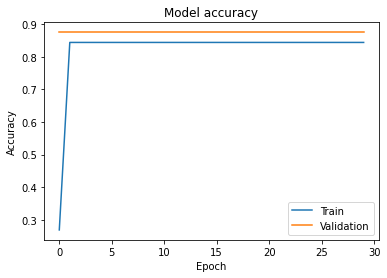

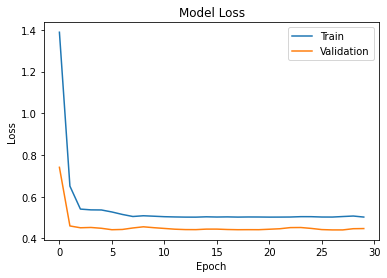

In [46]:
#Menampilkan hasil training model ke dalam grafik
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

#Plot Model

In [47]:
from tensorflow.keras.utils import plot_model

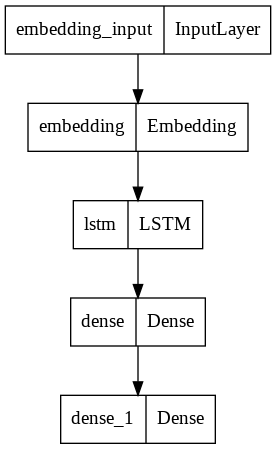

In [48]:
plot_model(model)

#Evaluasi Model

In [49]:
predicted = model.predict(X_test)

In [50]:
predicted_class = np.argmax(predicted, axis=1)

In [51]:
predicted_class

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

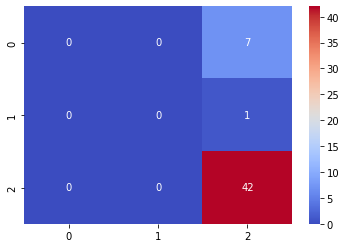

In [53]:
cm = confusion_matrix(y_test, predicted_class)
sns.heatmap(cm, annot=True, cmap = 'coolwarm')

In [54]:
print(classification_report(y_test, predicted_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         1
           2       0.84      1.00      0.91        42

    accuracy                           0.84        50
   macro avg       0.28      0.33      0.30        50
weighted avg       0.71      0.84      0.77        50



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
